# Volve production data analysis

The Volve production data was released in the form of an excel file made up of two (02) sheets, namely Daily Production Data and Monthly Production Data.
The dataset analized here is from [Kagle](https://www.kaggle.com/datasets/lamyalbert/volve-production-data).

In [ ]:
Import the nesessary modules

In [3]:
import sys, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Declare the working directories

In [9]:
# Declare the working directories

file_in = 'Volve production data.xlsx'
path_fig = 'fig'
path_res = f'results'
file_result = f'{path_res}/Volve_results.xlsx'

try:
    os.mkdir(path_res)
except:
    print(f'The Directory /{path_res} already exists.')

try:
    os.mkdir(path_fig)
except:
    print(f'The Directory /{path_fig} already exists.')


The Directory /results already exists.
The Directory /fig already exists.


# Some general graphics settings

In [10]:
# Graphics settings
figsize = (10, 6)
# Colors for graphics
color1 = 'tab:red'
color2 = 'tab:green'
color3 = 'tab:blue'

# Reading data and first observation

In [11]:
# Reading data and first observation
xl = pd.ExcelFile(file_in)
sheet_names = xl.sheet_names  # see all sheet names
print(f'Sheets in the data file: \n{sheet_names}')

Sheets in the data file: 
['Daily Production Data', 'Monthly Production Data']


There are 2 sheets 'Daily Production Data' and 'Monthly Production Data' in the data file.

# Reviewing column names


In [65]:
pdm_names_df = xl.parse(sheet_name='Monthly Production Data', nrows=5)
print(f'Monthly Production Data Head: \n{pdm_names_df}')

Monthly Production Data Head: 
  Wellbore name  NPDCode    Year  Month  On Stream       Oil         Gas  \
0           NaN      NaN     NaN    NaN        hrs       Sm3         Sm3   
1    15/9-F-1 C   7405.0  2014.0    4.0      227.5  11142.47  1597936.65   
2    15/9-F-1 C   7405.0  2014.0    5.0  733.83334  24901.95  3496229.65   
3    15/9-F-1 C   7405.0  2014.0    6.0  705.91666  19617.76  2886661.69   
4    15/9-F-1 C   7405.0  2014.0    7.0  742.41666  15085.68  2249365.75   

     Water   GI   WI  
0      Sm3  Sm3  Sm3  
1        0  NaN  NaN  
2   783.48  NaN  NaN  
3  2068.48  NaN  NaN  
4  6243.98  NaN  NaN  



Coluumn names in the 'Monthly Production Data' sheet are in 2 lines.

1) Line is names.

2) Line is units.

We combine this two lines in one.

# Constractin of new column names


In [66]:
pdm_names_df = pdm_names_df.fillna('')
print(f'Monthly Production Data Head (no Nan): \n{pdm_names_df}')
pdm_names = pdm_names_df.columns.tolist()
print(f'Monthly Production Data Names 0: \n{pdm_names}, len = {len(pdm_names)}')
pdm_names_add = pdm_names_df.iloc[0,].tolist()
print(f'Monthly Production Data Names 1: \n{pdm_names_add}, len = {len(pdm_names_add)}')
pdm_names_new = [f'{x}{y}' for x, y in zip(pdm_names, pdm_names_add)]
print(f'Monthly Production Data New Column Names: \n{pdm_names_new}')

Monthly Production Data Head (no Nan): 
  Wellbore name NPDCode    Year Month  On Stream       Oil         Gas  \
0                                            hrs       Sm3         Sm3   
1    15/9-F-1 C  7405.0  2014.0   4.0      227.5  11142.47  1597936.65   
2    15/9-F-1 C  7405.0  2014.0   5.0  733.83334  24901.95  3496229.65   
3    15/9-F-1 C  7405.0  2014.0   6.0  705.91666  19617.76  2886661.69   
4    15/9-F-1 C  7405.0  2014.0   7.0  742.41666  15085.68  2249365.75   

     Water   GI   WI  
0      Sm3  Sm3  Sm3  
1        0            
2   783.48            
3  2068.48            
4  6243.98            
Monthly Production Data Names 0: 
['Wellbore name', 'NPDCode', 'Year', 'Month', 'On Stream', 'Oil', 'Gas', 'Water', 'GI', 'WI'], len = 10
Monthly Production Data Names 1: 
['', '', '', '', 'hrs', 'Sm3', 'Sm3', 'Sm3', 'Sm3', 'Sm3'], len = 10
Monthly Production Data New Column Names: 
['Wellbore name', 'NPDCode', 'Year', 'Month', 'On Streamhrs', 'OilSm3', 'GasSm3', 'WaterSm3',

# Monthly Production Data

Importing Monthly Production Data to **pdm** dataframe with the new names.

In [67]:
# Monthly Production Data -> pdm
pdm = xl.parse(sheet_name='Monthly Production Data',
               skiprows=2,
               names=pdm_names_new)

print(f'Monthly Production Data Head: \n{pdm.head()}')
print(f'Monthly Production Data Info: \n{pdm.info()}')

Monthly Production Data Head: 
  Wellbore name  NPDCode  Year  Month  On Streamhrs    OilSm3      GasSm3  \
0    15/9-F-1 C     7405  2014      5     733.83334  24901.95  3496229.65   
1    15/9-F-1 C     7405  2014      6     705.91666  19617.76  2886661.69   
2    15/9-F-1 C     7405  2014      7     742.41666  15085.68  2249365.75   
3    15/9-F-1 C     7405  2014      8     432.99166   6970.43  1048190.80   
4    15/9-F-1 C     7405  2014      9     630.30000   9168.43  1414099.99   

   WaterSm3  GISm3  WISm3  
0    783.48    NaN    NaN  
1   2068.48    NaN    NaN  
2   6243.98    NaN    NaN  
3   4529.75    NaN    NaN  
4   8317.59    NaN    NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Wellbore name  525 non-null    object 
 1   NPDCode        525 non-null    int64  
 2   Year           525 non-null    int64  
 3   Month   

# Daily Production Data

Importing Daily Production Data to **pdd** dataframe.

In [68]:
# Daily Production Data -> pdd
pdd = xl.parse(sheet_name='Daily Production Data')
print(f'Daily Production Data Head: \n{pdd.head()}')

Daily Production Data Head: 
     DATEPRD WELL_BORE_CODE  NPD_WELL_BORE_CODE NPD_WELL_BORE_NAME  \
0 2014-04-07  NO 15/9-F-1 C                7405         15/9-F-1 C   
1 2014-04-08  NO 15/9-F-1 C                7405         15/9-F-1 C   
2 2014-04-09  NO 15/9-F-1 C                7405         15/9-F-1 C   
3 2014-04-10  NO 15/9-F-1 C                7405         15/9-F-1 C   
4 2014-04-11  NO 15/9-F-1 C                7405         15/9-F-1 C   

   NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE NPD_FACILITY_NAME  \
0         3420717          VOLVE             369304    MÆRSK INSPIRER   
1         3420717          VOLVE             369304    MÆRSK INSPIRER   
2         3420717          VOLVE             369304    MÆRSK INSPIRER   
3         3420717          VOLVE             369304    MÆRSK INSPIRER   
4         3420717          VOLVE             369304    MÆRSK INSPIRER   

   ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  ...  AVG_CHOKE_UOM  AVG_WHP_P  \
0            0.0                0.000

# Getting and cheking numbers of available wellbores


In [69]:
# Getting the number of available wellbores using the method df.unique()
pdd_wells = pdd['NPD_WELL_BORE_NAME'].unique()
pdm_wells = pdm['Wellbore name'].unique()
print(f"pdd_wells Num = {len(pdd_wells)}: \n{pdd_wells}\n")
print(f"pdm_wells Num = {len(pdm_wells)}: \n{pdm_wells}\n")
print(f'The same wells? \n{pdd_wells.sort() == pdm_wells.sort()}')

pdd_wells Num = 7: 
['15/9-F-1 C' '15/9-F-11' '15/9-F-12' '15/9-F-14' '15/9-F-15 D' '15/9-F-4'
 '15/9-F-5']

pdm_wells Num = 7: 
['15/9-F-1 C' '15/9-F-11' '15/9-F-12' '15/9-F-14' '15/9-F-15 D' '15/9-F-4'
 '15/9-F-5']

The same wells? 
True


# Data cleaning and transformation
### Handle missing values

In [70]:
# Data cleaning and transformation
# Handle missing values
print(f'pdd.isna().sum(): \n{pdd.isna().sum()}\n')
print(f'pdm.isna().sum(): \n{pdm.isna().sum()}\n')
pdd.fillna(0, inplace=True)
pdm.fillna(0, inplace=True)


pdd.isna().sum(): 
DATEPRD                        0
WELL_BORE_CODE                 0
NPD_WELL_BORE_CODE             0
NPD_WELL_BORE_NAME             0
NPD_FIELD_CODE                 0
NPD_FIELD_NAME                 0
NPD_FACILITY_CODE              0
NPD_FACILITY_NAME              0
ON_STREAM_HRS                285
AVG_DOWNHOLE_PRESSURE       6654
AVG_DOWNHOLE_TEMPERATURE    6654
AVG_DP_TUBING               6654
AVG_ANNULUS_PRESS           7744
AVG_CHOKE_SIZE_P            6715
AVG_CHOKE_UOM               6473
AVG_WHP_P                   6479
AVG_WHT_P                   6488
DP_CHOKE_SIZE                294
BORE_OIL_VOL                6473
BORE_GAS_VOL                6473
BORE_WAT_VOL                6473
BORE_WI_VOL                 9928
FLOW_KIND                      0
WELL_TYPE                      0
dtype: int64

pdm.isna().sum(): 
Wellbore name      0
NPDCode            0
Year               0
Month              0
On Streamhrs      11
OilSm3           215
GasSm3           215
WaterSm3 

### All the NaN values were replaced by zero (0)

In [71]:
# All the NaN values were replaced by zero (0)
print(f'pdd.isna().sum(): \n{pdd.isna().sum()}\n')
print(f'pdm.isna().sum(): \n{pdm.isna().sum()}\n')
print(f'pdd.isnull().sum(): \n{pdd.isnull().sum()}\n')
print(f'pdm.isnull().sum(): \n{pdm.isnull().sum()}\n')


pdd.isna().sum(): 
DATEPRD                     0
WELL_BORE_CODE              0
NPD_WELL_BORE_CODE          0
NPD_WELL_BORE_NAME          0
NPD_FIELD_CODE              0
NPD_FIELD_NAME              0
NPD_FACILITY_CODE           0
NPD_FACILITY_NAME           0
ON_STREAM_HRS               0
AVG_DOWNHOLE_PRESSURE       0
AVG_DOWNHOLE_TEMPERATURE    0
AVG_DP_TUBING               0
AVG_ANNULUS_PRESS           0
AVG_CHOKE_SIZE_P            0
AVG_CHOKE_UOM               0
AVG_WHP_P                   0
AVG_WHT_P                   0
DP_CHOKE_SIZE               0
BORE_OIL_VOL                0
BORE_GAS_VOL                0
BORE_WAT_VOL                0
BORE_WI_VOL                 0
FLOW_KIND                   0
WELL_TYPE                   0
dtype: int64

pdm.isna().sum(): 
Wellbore name    0
NPDCode          0
Year             0
Month            0
On Streamhrs     0
OilSm3           0
GasSm3           0
WaterSm3         0
GISm3            0
WISm3            0
dtype: int64

pdd.isnull().sum(): 
DAT

# Dates construction from Year and Month.

In [72]:
# Type conversions
print(f'pdd.dtypes: \n{pdd.dtypes}\n')
print(f'pdm.dtypes: \n{pdm.dtypes}\n')
pdm[['year', 'month']] = pdm[['Year', 'Month']].astype('str')
format = "%Y%m%d"
pdm['date0'] = pdm['year'] + pdm['month'] + '15'
pdm['date'] = pd.to_datetime(pdm['date0'], format=format)
print(f'pdm.dtypes: \n{pdm.dtypes}\n')

pdd.dtypes: 
DATEPRD                     datetime64[ns]
WELL_BORE_CODE                      object
NPD_WELL_BORE_CODE                   int64
NPD_WELL_BORE_NAME                  object
NPD_FIELD_CODE                       int64
NPD_FIELD_NAME                      object
NPD_FACILITY_CODE                    int64
NPD_FACILITY_NAME                   object
ON_STREAM_HRS                      float64
AVG_DOWNHOLE_PRESSURE              float64
AVG_DOWNHOLE_TEMPERATURE           float64
AVG_DP_TUBING                      float64
AVG_ANNULUS_PRESS                  float64
AVG_CHOKE_SIZE_P                   float64
AVG_CHOKE_UOM                       object
AVG_WHP_P                          float64
AVG_WHT_P                          float64
DP_CHOKE_SIZE                      float64
BORE_OIL_VOL                       float64
BORE_GAS_VOL                       float64
BORE_WAT_VOL                       float64
BORE_WI_VOL                        float64
FLOW_KIND                           objec

# Add new columns

In [73]:
# Add new columns
pdm['LiqSm3'] = pdm['OilSm3'] + pdm['WaterSm3']
# Calculation of production characteristics by wells
pdm['WCT'] = pdm['WaterSm3'] / pdm['LiqSm3']
pdm['GOR'] = pdm['GasSm3'] / pdm['OilSm3']
pdm['WOR'] = pdm['WaterSm3'] / pdm['OilSm3']

print(f'pdm.dtypes: \n{pdm.dtypes}\n')
print(f'pdm.head: \n{pdm["date"].head(5)}\n')

pdm.dtypes: 
Wellbore name            object
NPDCode                   int64
Year                      int64
Month                     int64
On Streamhrs            float64
OilSm3                  float64
GasSm3                  float64
WaterSm3                float64
GISm3                   float64
WISm3                   float64
year                     object
month                    object
date0                    object
date             datetime64[ns]
LiqSm3                  float64
WCT                     float64
GOR                     float64
WOR                     float64
dtype: object

pdm.head: 
0   2014-05-15
1   2014-06-15
2   2014-07-15
3   2014-08-15
4   2014-09-15
Name: date, dtype: datetime64[ns]



# Calculation of accumulated values

In [74]:
# Calculation of accumulated values
prod = ['OilSm3', 'GasSm3', 'WaterSm3', 'GISm3', 'WISm3', 'LiqSm3', 'On Streamhrs']
totprodwell = pdm.groupby('Wellbore name')[prod].sum()
print(f'Total production by well\n{totprodwell}')

prodacc = ['Oil_accSm3',
           'Gas_accSm3',
           'Water_accSm3',
           'GI_accSm3',
           'WI_accSm3',
           'Liq_accSm3',
           'Hr_acc']
pdm[prodacc] = pdm.groupby('Wellbore name')[prod].cumsum()

Total production by well
                   OilSm3        GasSm3    WaterSm3  GISm3         WISm3  \
Wellbore name                                                              
15/9-F-1 C      166566.86  2.484298e+07   207302.39    0.0  0.000000e+00   
15/9-F-11      1147849.10  1.743105e+08  1090806.27    0.0  0.000000e+00   
15/9-F-12      4579609.55  6.675423e+08  6833320.37    0.0  0.000000e+00   
15/9-F-14      3942233.39  5.780095e+08  7121249.74    0.0  0.000000e+00   
15/9-F-15 D     148518.56  2.250535e+07    52366.40    0.0  0.000000e+00   
15/9-F-4             0.00  0.000000e+00        0.00    0.0  1.624073e+07   
15/9-F-5         41160.68  6.561826e+06    13533.18    0.0  1.408941e+07   

                    LiqSm3  On Streamhrs  
Wellbore name                             
15/9-F-1 C       373869.25    9756.03315  
15/9-F-11       2238655.37   26006.21614  
15/9-F-12      11412929.92   65204.06928  
15/9-F-14      11063483.13   62773.67519  
15/9-F-15 D      200884.96   178

# Calculation of total production values

In [75]:
# Calculation of total production values
totprod = totprodwell.sum()
print(f'Total production \n{totprod}')

Total production 
OilSm3          1.002594e+07
GasSm3          1.473772e+09
WaterSm3        1.531858e+07
GISm3           0.000000e+00
WISm3           3.033013e+07
LiqSm3          2.534452e+07
On Streamhrs    3.066618e+05
dtype: float64


# Calculation of production characteristics by field

In [76]:
# Calculation of production characteristics by field
field_prod = pdm.groupby('date')[prod].sum()
print(f'Field production \n{field_prod.head()}')
field_prod[prodacc] = field_prod[prod].cumsum()

field_prod['Oil_rate'] = field_prod['OilSm3'] / totprod['OilSm3']
field_prod['Water_rate'] = field_prod['WaterSm3'] / totprod['WaterSm3']
field_prod['Liq_rate'] = field_prod['LiqSm3'] / totprod['LiqSm3']
field_prod['Oil_take'] = field_prod['Oil_accSm3'] / totprod['OilSm3']
field_prod['Water_take'] = field_prod['Water_accSm3'] / totprod['WaterSm3']
field_prod['Liq_take'] = field_prod['Liq_accSm3'] / totprod['LiqSm3']
field_prod['WCT'] = field_prod['WaterSm3'] / field_prod['LiqSm3']
field_prod['GOR'] = field_prod['GasSm3'] / field_prod['OilSm3']
field_prod['WOR'] = field_prod['WaterSm3'] / field_prod['OilSm3']

Field production 
              OilSm3      GasSm3  WaterSm3  GISm3  WISm3    LiqSm3  \
date                                                                 
2007-09-15      0.00        0.00      0.00    0.0    0.0      0.00   
2007-10-15      0.00        0.00      0.00    0.0    0.0      0.00   
2007-11-15      0.00        0.00      0.00    0.0    0.0      0.00   
2007-12-15      0.00        0.00      0.00    0.0    0.0      0.00   
2008-02-15  49091.06  7068009.29    412.61    0.0    0.0  49503.67   

            On Streamhrs  
date                      
2007-09-15       0.00000  
2007-10-15       0.00000  
2007-11-15       0.00000  
2007-12-15       0.00000  
2008-02-15     406.62499  


In [77]:
# Calculation of the annual data
field_annual = pdm.groupby('Year')[prod].sum()
field_annual[prodacc] = field_annual[prod].cumsum()
field_annual['Oil_rate'] = field_annual['OilSm3'] / totprod['OilSm3']
field_annual['Liq_rate'] = (field_annual['LiqSm3']) / totprod['LiqSm3']
field_annual['Water_rate'] = (field_annual['WaterSm3']) / totprod['WaterSm3']
field_annual['Oil_take'] = field_annual['Oil_accSm3'] / totprod['OilSm3']
field_annual['Liq_take'] = field_annual['Liq_accSm3'] / totprod['LiqSm3']
field_annual['WCT'] = field_annual['WaterSm3'] / field_annual['LiqSm3']
print(f'Annual production / Injection \n{field_annual}')

Annual production / Injection 
          OilSm3        GasSm3    WaterSm3  GISm3         WISm3      LiqSm3  \
Year                                                                          
2007        0.00  0.000000e+00        0.00    0.0  0.000000e+00        0.00   
2008  1764375.15  2.570386e+08    23508.94    0.0  2.417770e+06  1787884.09   
2009  2684392.04  3.759820e+08   232103.74    0.0  4.392198e+06  2916495.78   
2010  1689902.55  2.439484e+08  1887594.78    0.0  4.569394e+06  3577497.33   
2011   847965.40  1.303202e+08  2190640.28    0.0  3.442446e+06  3038605.68   
2012   574206.33  9.020864e+07  2109601.63    0.0  2.975214e+06  2683807.96   
2013   558012.53  8.758778e+07  2576365.79    0.0  3.453761e+06  3134378.32   
2014   731965.02  1.101939e+08  2716070.92    0.0  3.825493e+06  3448035.94   
2015   861749.06  1.284238e+08  2009825.86    0.0  3.201627e+06  2871574.92   
2016   313370.06  5.006913e+07  1572866.41    0.0  2.052229e+06  1886236.47   

      On Streamhrs  

Construction of the Volve field chart 01


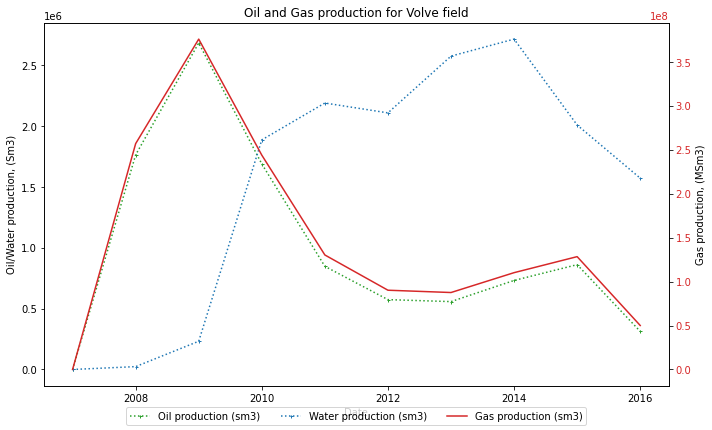

In [78]:
# Construction of the Volve field charts
# prod = ['OilSm3', 'GasSm3', 'WaterSm3', 'GISm3', 'WISm3']
print(f'Construction of the Volve field chart 01')
fig, ax1 = plt.subplots(figsize=figsize)
ax1.plot(field_annual.index,
         field_annual['OilSm3'],
         ls=':',
         color=color2,
         marker='+',
         ms=3,
         label='Oil production (sm3)')
ax1.plot(field_annual.index,
         field_annual['WaterSm3'],
         ls=':',
         color=color3,
         marker='+',
         ms=3,
         label='Water production (sm3)')
ax1.set(xlabel='Date', ylabel='Oil/Water production, (Sm3)',
        title=f'Oil and Gas production for Volve field')

ax2 = ax1.twinx()
ax2.plot(field_annual.index, field_annual['GasSm3'], color=color1, label='Gas production (sm3)')
ax2.set(ylabel='Gas production, (MSm3)')
ax2.tick_params(axis='y', labelcolor=color1)
fig.tight_layout()
fig.legend(loc='lower center', ncol=3)
#fig.savefig(f"{path_res}/fig_field_01.png")
plt.show()

Construction of the Volve field chart 01m


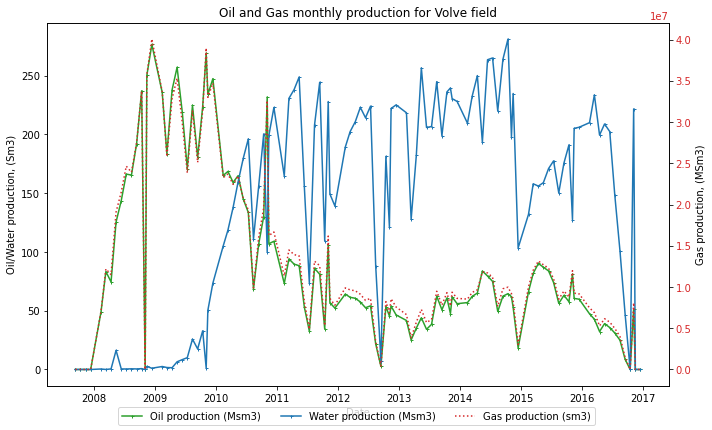

In [79]:
print(f'Construction of the Volve field chart 01m')
fig, ax1 = plt.subplots(figsize=figsize)
ax1.plot(field_prod.index,
         field_prod['OilSm3'] / 1000,
         ls='-',
         color=color2,
         marker='+',
         ms=3,
         label='Oil production (Msm3)')

ax1.plot(field_prod.index,
         field_prod['WaterSm3'] / 1000,
         ls='-',
         color=color3,
         marker='+',
         ms=3,
         label='Water production (Msm3)')

ax1.set(xlabel='Date', ylabel='Oil/Water production, (Sm3)',
        title=f'Oil and Gas monthly production for Volve field')

ax2 = ax1.twinx()
ax2.plot(field_prod.index,
         field_prod['GasSm3'],
         color=color1,
         ls=':',
         label='Gas production (sm3)')
ax2.set(ylabel='Gas production, (MSm3)')
ax2.tick_params(axis='y', labelcolor=color1)

fig.tight_layout()
fig.legend(loc='lower center', ncol=5)
#fig.savefig(f"{path_res}/fig_field_01m.png")
plt.show()

Construction of the Volve field chart 02


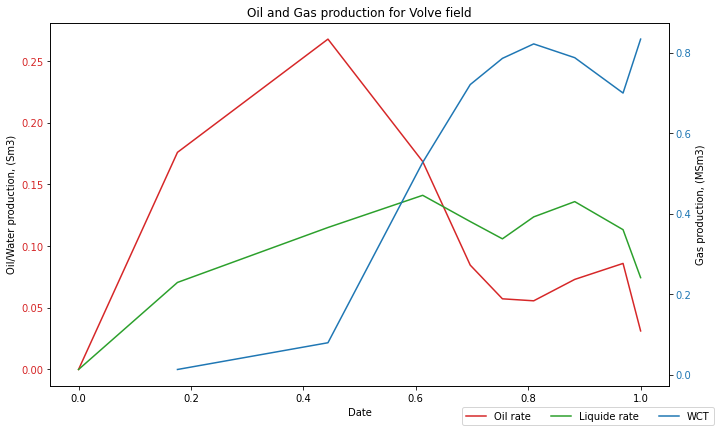

In [80]:
print(f'Construction of the Volve field chart 02')
fig, ax1 = plt.subplots(figsize=figsize)
ax1.plot(field_annual['Oil_take'], field_annual['Oil_rate'], color=color1, label='Oil rate')
ax1.plot(field_annual['Oil_take'], field_annual['Liq_rate'], color=color2, label='Liquide rate')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set(xlabel='Date', ylabel='Oil/Water production, (Sm3)',
        title=f'Oil and Gas production for Volve field')

ax2 = ax1.twinx()
ax2.plot(field_annual['Oil_take'], field_annual['WCT'], color=color3, label='WCT')
ax2.set(ylabel='Gas production, (MSm3)')
ax2.tick_params(axis='y', labelcolor=color3)
fig.tight_layout()
fig.legend(loc='lower right', ncol=3)
# fig.savefig(f"{path_res}/fig_field_02.png")
plt.show()


Construction of the Volve field mothly chart 02m


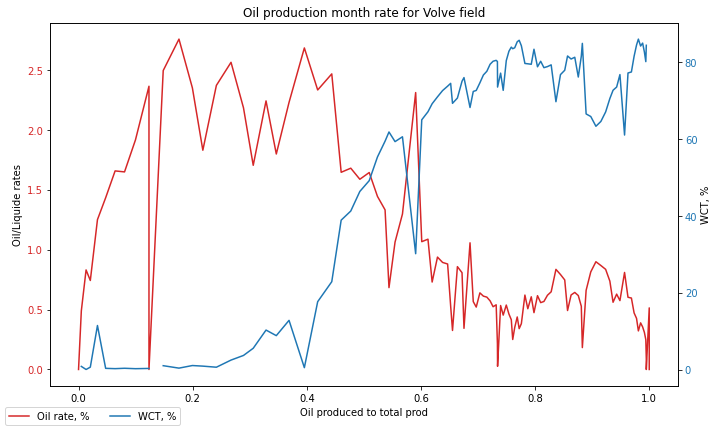

In [81]:
print(f'Construction of the Volve field mothly chart 02m')
# field_prod_filt = field_prod[field_prod['Oil_rate'] > 0]
fig, ax1 = plt.subplots(figsize=figsize)
ax1.plot(field_prod['Oil_take'].sort_values(),
         field_prod['Oil_rate'] * 100,
         color=color1,
         label='Oil rate, %')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set(xlabel='Oil produced to total prod', ylabel='Oil/Liquide rates',
        title=f'Oil production month rate for Volve field')

ax2 = ax1.twinx()
ax2.plot(field_prod['Oil_take'].sort_values(),
         field_prod['WCT'] * 100,
         color=color3,
         label='WCT, %')
ax2.set(ylabel='WCT, %')
ax2.tick_params(axis='y', labelcolor=color3)
fig.tight_layout()
fig.legend(loc='lower left', ncol=2)
#fig.savefig(f"{path_res}/fig_field_02m.png")
plt.show()

Construction of the Volve field mothly chart 03m


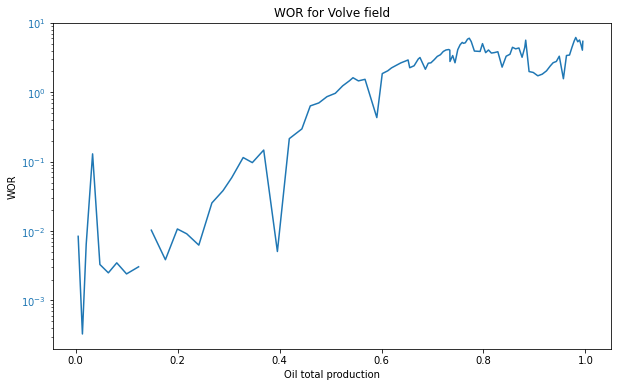

In [82]:
print(f'Construction of the Volve field mothly chart 03m')
# field_prod_filt = field_prod[field_prod['Oil_rate'] > 0]
fig, ax1 = plt.subplots(figsize=figsize)
color = color3
ax1.plot(field_prod['Oil_take'].sort_values(),
         field_prod['WOR'],
         color=color,
         label='WOR')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set(xlabel='Oil total production', ylabel='WOR',
        title=f'WOR for Volve field')
ax1.set_yscale('log')
fig.savefig(f"{path_res}/fig_field_03m.png")
plt.show()


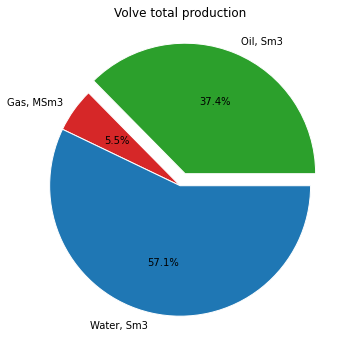

In [83]:
# Pie diagram fore Volve total production
fig, ax = plt.subplots(figsize=figsize)
values = [totprod['OilSm3'], totprod['GasSm3'] / 1000, totprod['WaterSm3']]
labels = ['Oil, Sm3', 'Gas, MSm3', 'Water, Sm3']
colors = (color2, color1, color3)
explode = (0.1, 0, 0)
ax.pie(values, colors=colors,
       wedgeprops={"linewidth": 1, "edgecolor": "white"},
       frame=False,
       labels=labels,
       explode=explode,
       autopct='%1.1f%%')
ax.set_title('Volve total production')
plt.show()

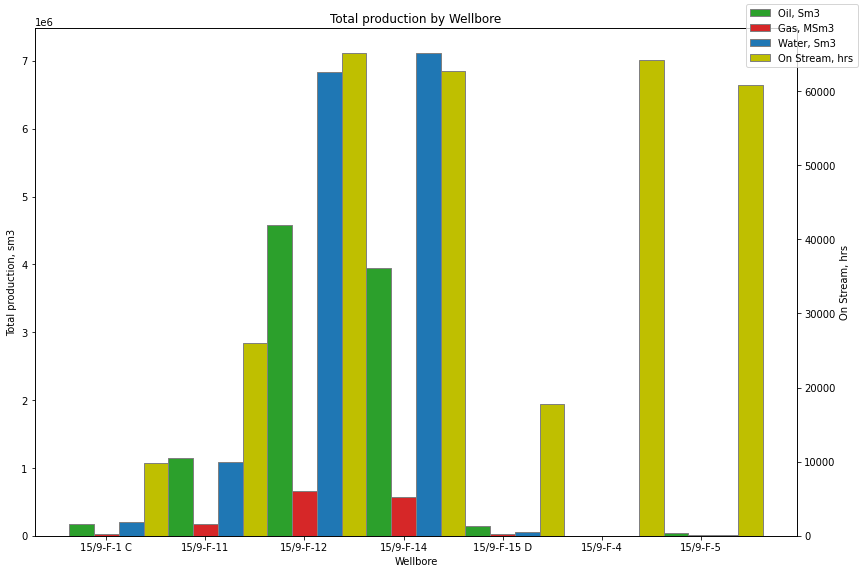

In [84]:
# Constructing bars 
fig, ax1 = plt.subplots(figsize=(12, 8))
# set width of bar
barWidth = 0.25
# set height of bar
oil = totprodwell['OilSm3']
gas = totprodwell['GasSm3'] / 1000
water = totprodwell['WaterSm3']
hr = totprodwell['On Streamhrs']  #/ (24*30)
# Set position of bar on X axis
br1 = np.arange(len(pdm_wells))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
# Make the plot
plt.bar(br1, oil, color=color2, width=barWidth,
        edgecolor='grey', label='Oil, Sm3')
plt.bar(br2, gas, color=color1, width=barWidth,
        edgecolor='grey', label='Gas, MSm3')
plt.bar(br3, water, color=color3, width=barWidth,
        edgecolor='grey', label='Water, Sm3')
ax1.set(xlabel='Wellbore', ylabel='Total production, sm3',
        title='Total production by Wellbore')

ax2 = ax1.twinx()
plt.bar(br4, hr, color='y', width=barWidth,
        edgecolor='grey', label='On Stream, hrs')
ax2.set(ylabel='On Stream, hrs')
plt.xticks([r + barWidth for r in range(len(pdm_wells))],  pdm_wells)
fig.tight_layout()
# loc = 'best', bbox_to_anchor=(0.5, 0., 0.5, 0.5)
fig.legend()
#fig.savefig(f"{path_res}/fig_wells_02.png")
plt.show()

# Construction of charts of well monthly data

In [85]:
# Analysis by graphics
# Construction of charts by wells
print('Construction of charts by wells')
print(f"pdm_wells Num = {len(pdm_wells)}: \n{pdm_wells}\n")

Construction of charts by wells
pdm_wells Num = 7: 
['15/9-F-1 C' '15/9-F-11' '15/9-F-12' '15/9-F-14' '15/9-F-15 D' '15/9-F-4'
 '15/9-F-5']



Construction of the WOR vc  Oil accumulated production for 15/9-F-1 C well


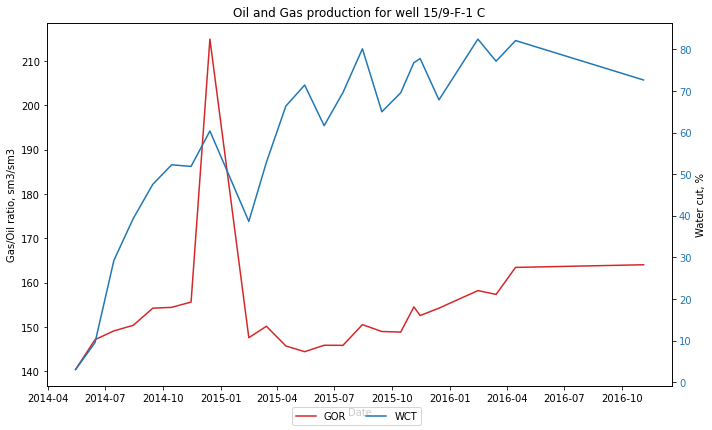

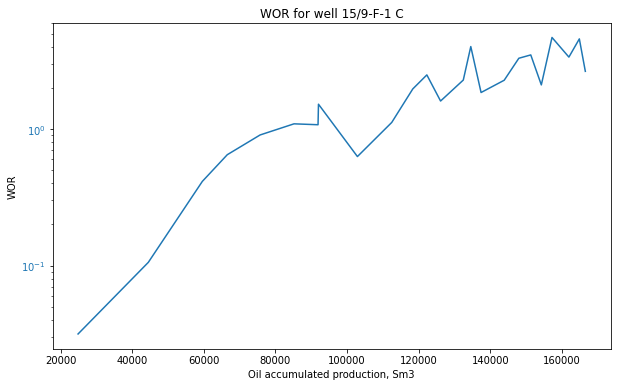

Construction of the WOR vc  Oil accumulated production for 15/9-F-11 well


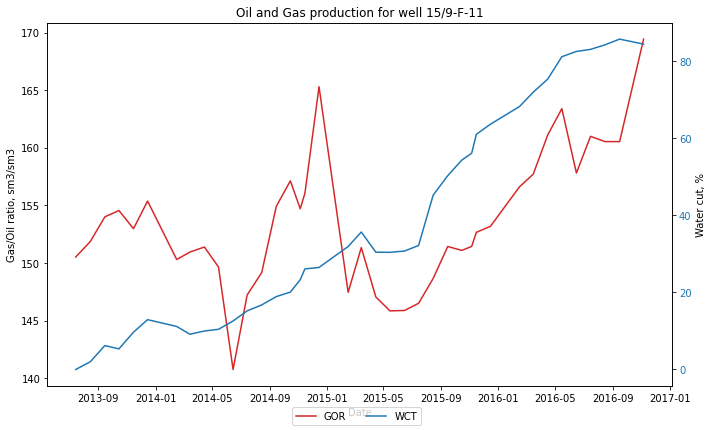

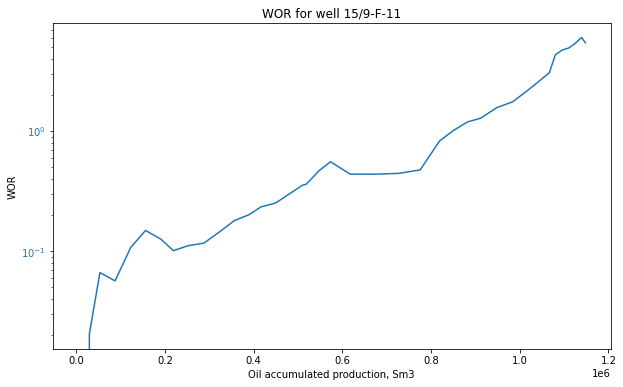

Construction of the WOR vc  Oil accumulated production for 15/9-F-12 well


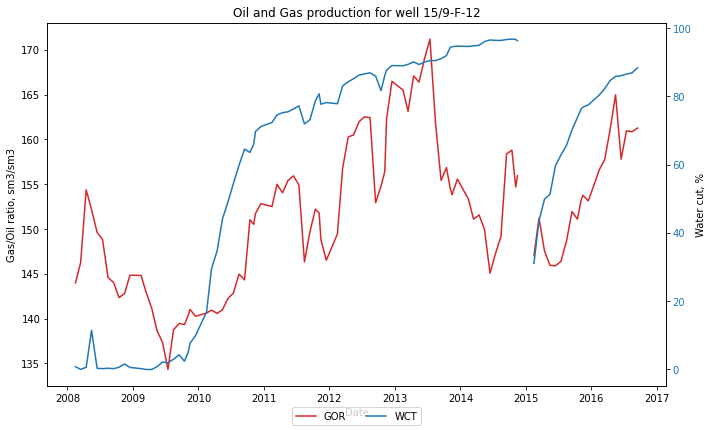

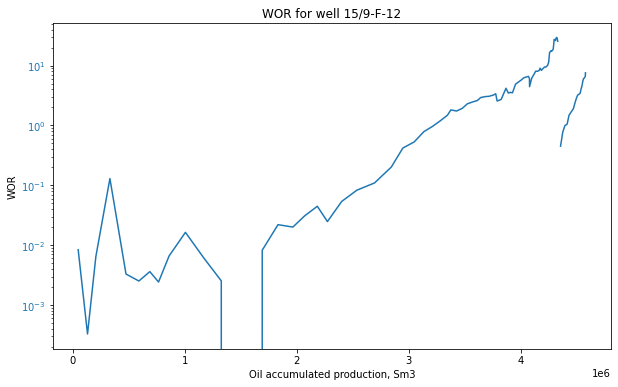

Construction of the WOR vc  Oil accumulated production for 15/9-F-14 well


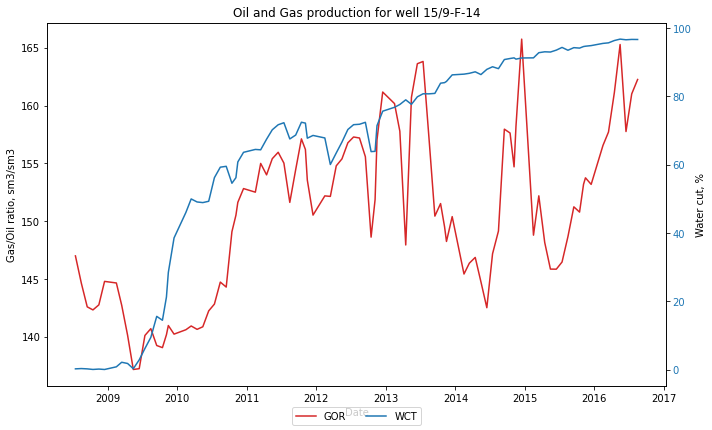

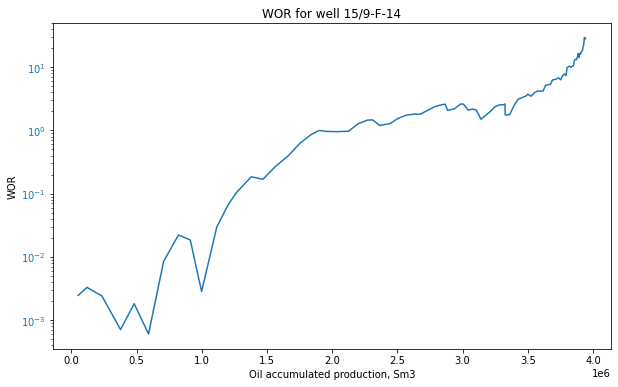

Construction of the WOR vc  Oil accumulated production for 15/9-F-15 D well


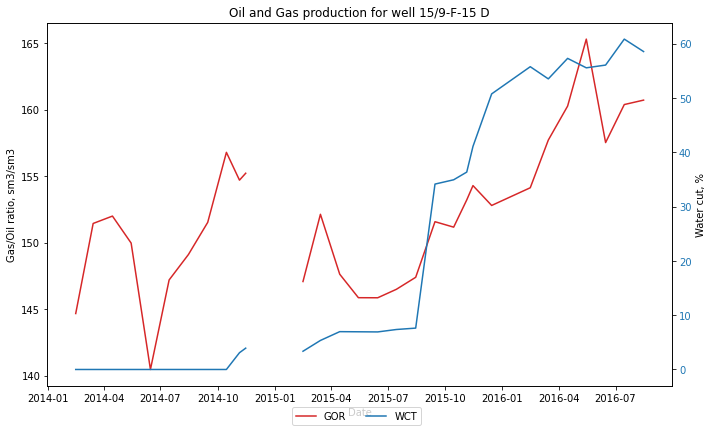

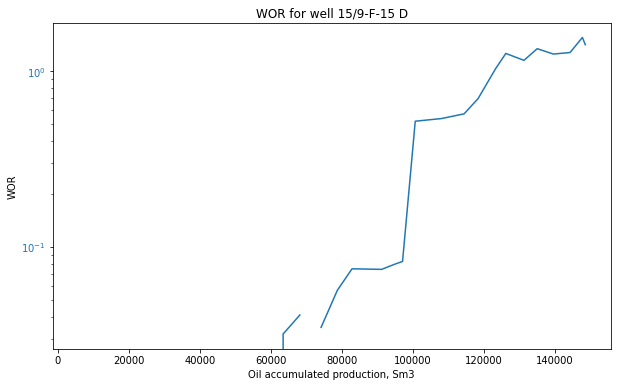

Construction of the WOR vc  Oil accumulated production for 15/9-F-4 well


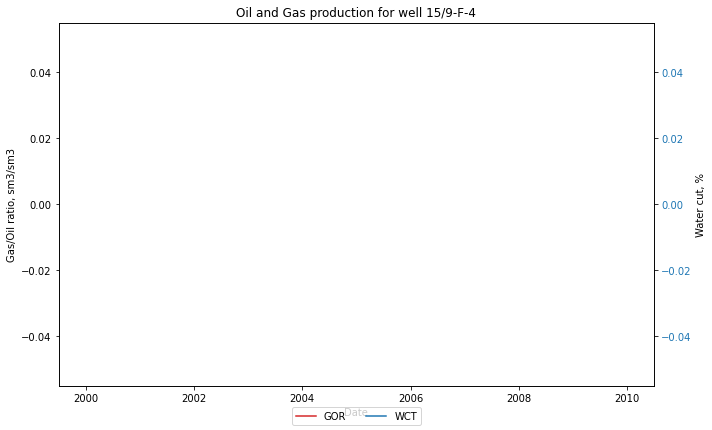

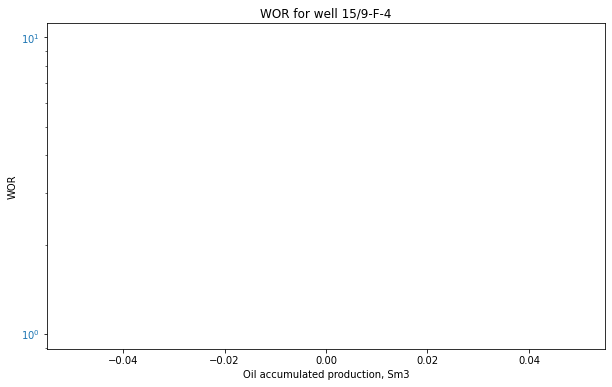

Construction of the WOR vc  Oil accumulated production for 15/9-F-5 well


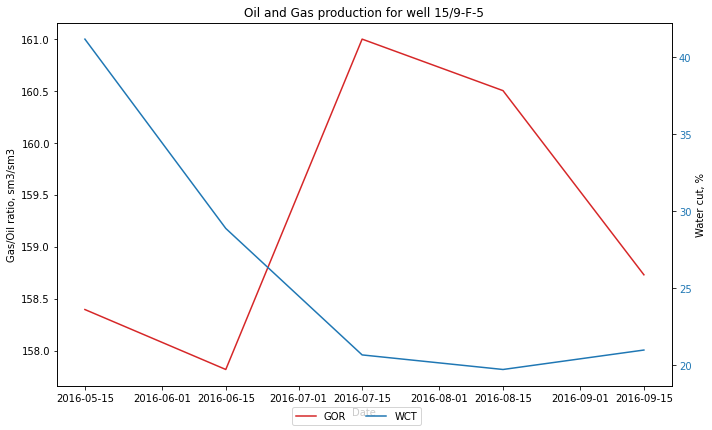

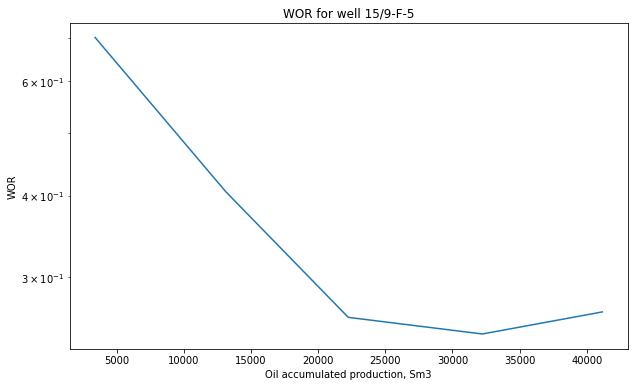

In [86]:
i = 0
for well in pdm_wells:
    # print(f'Construction of the graph for {well[5:]}')
    wellbore = pdm[pdm['Wellbore name'] == well].copy()
    fig, ax1 = plt.subplots(figsize=figsize)
    ax1.plot(wellbore['date'].sort_values(),
             wellbore['OilSm3'],
             color=color2,
             label='Oil production (sm3)')
    ax1.set(xlabel='Date', ylabel='Oil production, (Sm3)',
            title=f'Oil and Gas production for well {well}')

    ax2 = ax1.twinx()
    ax2.plot(wellbore['date'].sort_values(),
             wellbore['GasSm3'],
             color=color1,
             label='Gas production (sm3)')
    ax2.set(ylabel='Gas production, (MSm3)')
    ax2.tick_params(axis='y', labelcolor=color2)
    fig.tight_layout()
    fig.legend(loc='lower center', ncol=3)
    #fig.savefig(f"{path_res}/fig {well[5:]}_01.png")
    plt.close()

    fig, ax1 = plt.subplots(figsize=figsize)
    ax1.plot(wellbore['date'].sort_values(), wellbore['GOR'], color=color1, label='GOR')
    ax1.set(xlabel='Date', ylabel='Gas/Oil ratio, sm3/sm3',
            title=f'Oil and Gas production for well {well}')

    ax2 = ax1.twinx()
    ax2.plot(wellbore['date'].sort_values(), wellbore['WCT'] * 100, color=color3, label='WCT')
    ax2.set(ylabel='Water cut, %')
    ax2.tick_params(axis='y', labelcolor=color3)
    fig.tight_layout()
    fig.legend(loc='lower center', ncol=3)
    #fig.savefig(f"{path_res}/fig {well[5:]}_02.png")

    print(f'Construction of the WOR vc  Oil accumulated production for {well} well')
    wellbore['WOR'] = wellbore['WaterSm3']/wellbore['OilSm3']
    #' Oil_accSm3'  well[5:]
    fig, ax = plt.subplots(figsize=figsize)
    color = color3
    ax.plot(wellbore['Oil_accSm3'].sort_values(),
             wellbore['WOR'],
         color=color,
         label='WOR')
    ax.tick_params(axis='y', labelcolor=color)
    ax.set(xlabel='Oil accumulated production, Sm3', ylabel='WOR',
        title=f'WOR for well {well}')
    ax.set_yscale('log')
    #fig.savefig(f"{path_res}/fig {well[5:]}_03.png")

    i += 1
    plt.show()


# Daily data analysis

Construction of the daily graph for F-1 C


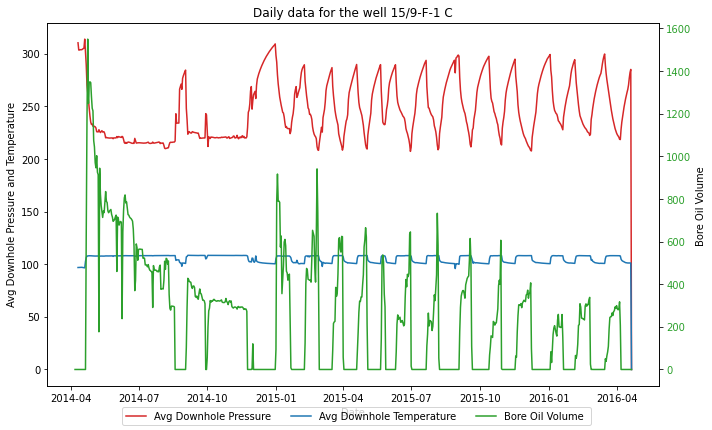

Construction of the daily graph for F-11


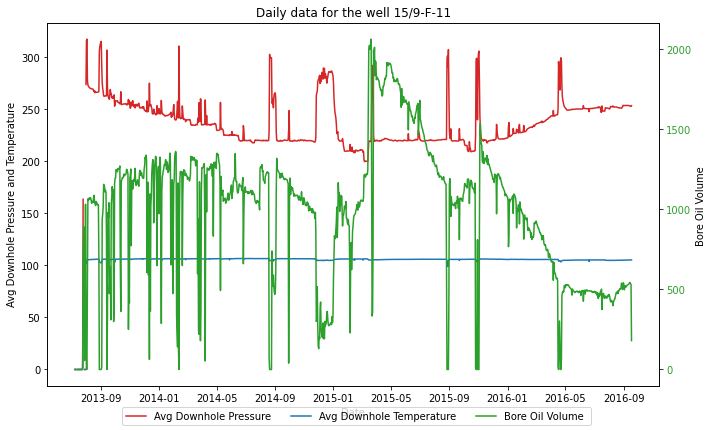

Construction of the daily graph for F-12


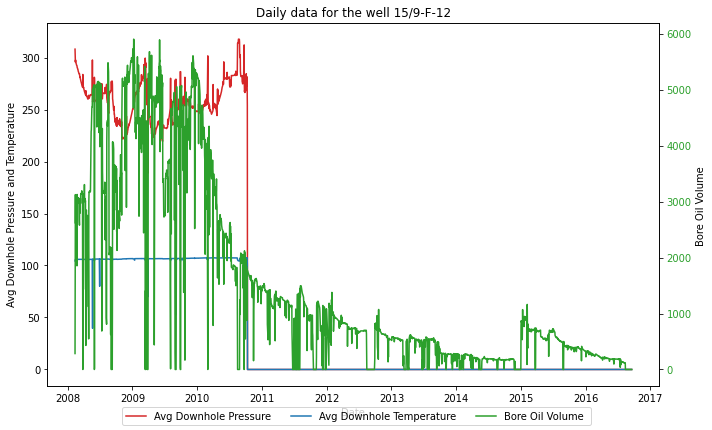

Construction of the daily graph for F-14


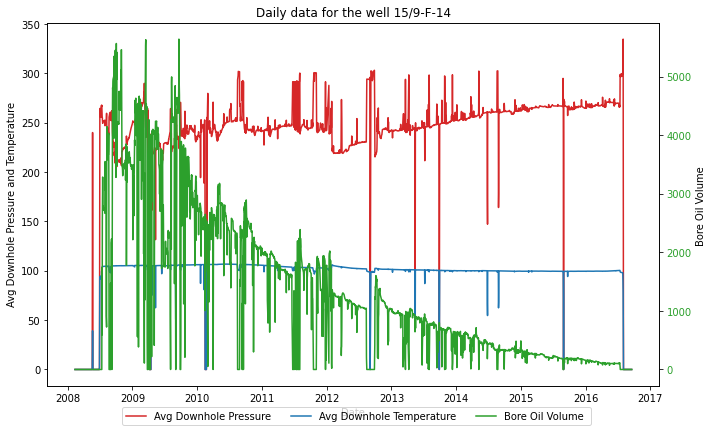

Construction of the daily graph for F-15 D


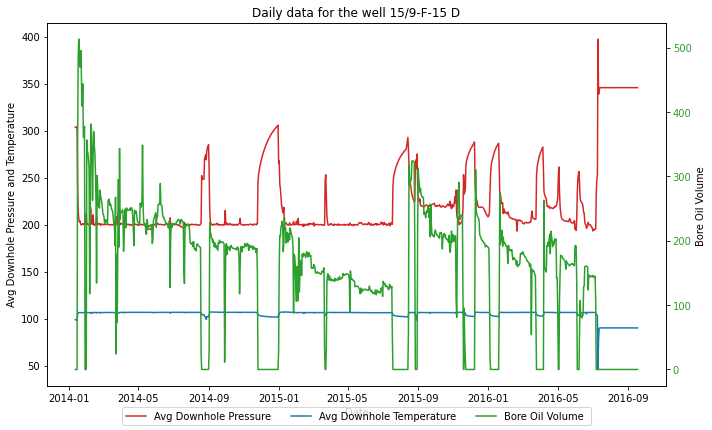

Construction of the daily graph for F-4


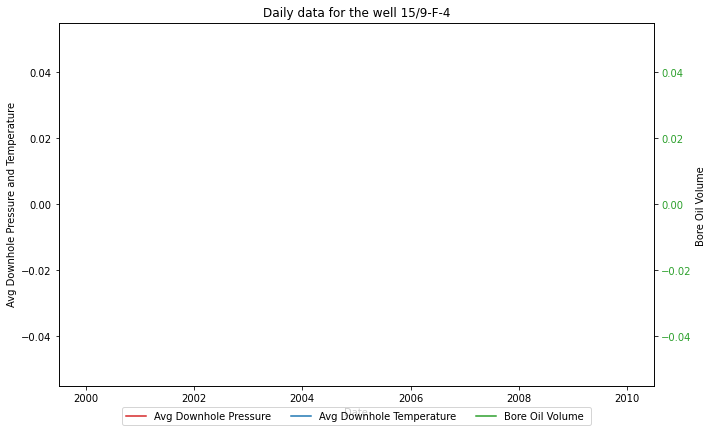

Construction of the daily graph for F-5


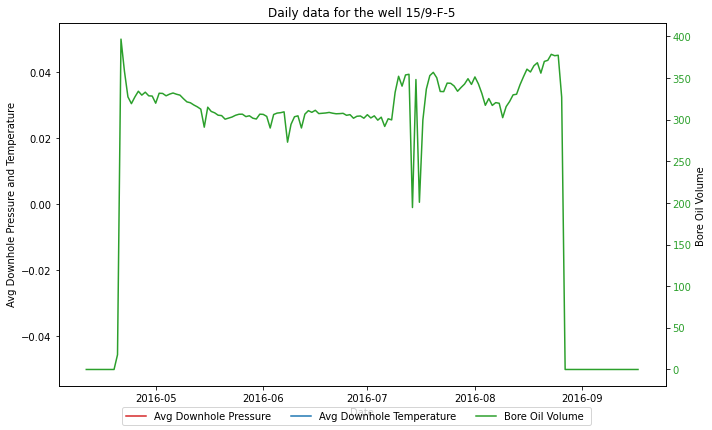

In [59]:
# Daily data analysis
for well in pdm_wells:
    print(f'Construction of the daily graph for {well[5:]}')
    wellbore = pdd[pdd['NPD_WELL_BORE_NAME'] == well]
    fig, ax1 = plt.subplots(figsize=figsize)
    ax1.plot(wellbore['DATEPRD'].sort_values(),
             wellbore['AVG_DOWNHOLE_PRESSURE'],
             color=color1,
             label='Avg Downhole Pressure')
    ax1.plot(wellbore['DATEPRD'].sort_values(),
             wellbore['AVG_DOWNHOLE_TEMPERATURE'],
             color=color3,
             label='Avg Downhole Temperature')
    ax1.set(xlabel='Date', ylabel='Avg Downhole Pressure and Temperature',
            title=f'Daily data for the well {well}')

    ax2 = ax1.twinx()
    ax2.plot(wellbore['DATEPRD'].sort_values(),
             wellbore['BORE_OIL_VOL'],
             color=color2,
             label='Bore Oil Volume ')
    ax2.set(ylabel='Bore Oil Volume ')
    ax2.tick_params(axis='y', labelcolor=color2)
    fig.tight_layout()
    fig.legend(loc='lower center', ncol=3)
    #fig.savefig(f"{path_res}/fig {well[5:]}_03.png")
    i += 1
    # plt.close()
    plt.show()
